# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [6]:
pip install openpyxl

     |████████████████████████████████| 242 kB 2.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sm/.pyenv/versions/3.10.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
import re

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [11]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",
                  na_values=["Unknown", "UNKNOWN", "no name" ,"unknown"])

In [13]:
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81932,10001,Cheeseburger,M,Pug,NaN,Fawn,NaN,NaN,2013-01-01,Yes,NaN,Yes,2016-04-28 15:11:18.533,2016-04-28,2017-04-28
81933,10021,Jack,M,NaN,NaN,Cream,NaN,NaN,2015-07-01,Yes,NaN,Yes,2016-04-28 15:12:22.150,2016-04-28,2017-04-28
81934,10032,Petunia,F,Lhasa Apso,NaN,GOLD,BLACK,WHITE,2009-11-01,Yes,No,Yes,2016-04-28 15:18:14.240,2016-04-28,2018-02-18
81935,10310,Max,M,Cocker Spaniel,NaN,WHITE,BROWN,NaN,2006-04-01,Yes,No,Yes,2016-04-28 15:18:44.520,2016-04-28,2017-06-19


In [14]:
# if you want the first 30,000 rows, use read.excel....
# if you want a random 30,000 rows, use df = df.sample(30000)

In [15]:
# df = pd.read_csv("craftcans.csv",  
#                  na_values=["Does not apply", "NaN"],
#                  encoding="utf-8")

In [16]:
# df = df.str.lower()

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [17]:
df.shape

(81937, 15)

In [18]:
df.shape[0]

81937

In [19]:
type(df.shape)

tuple

In [20]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [21]:
# df.info

In [22]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [23]:
#  df.Beer = df.Beer.str.replace("12 oz.", "", regex=False)

In [24]:
# df[df.Size.isnull()]

In [25]:
# df[df.Animal_Name.isnull()]

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [26]:
# Each row is a Dog License application for a specific dog owned by a specific owner.
# "Animal Name" is the category of name given to an owner's dog
# "Application Date" is the category of date and time that the application for Dog Licensee is filed
# "Animal Gender" is a category of whether the animal is male (M) or female(F)

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [27]:
# 1. What is the most popular month for dog births?
# 2. What primary breed is most often vaccinated?
# 3. What is the most popular name for a dog beginning with the letter Q?
# 4. Which zipcode has the most labradors?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [28]:
breeds=df["Primary Breed"]

In [29]:
breeds.value_counts().head(10)

Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

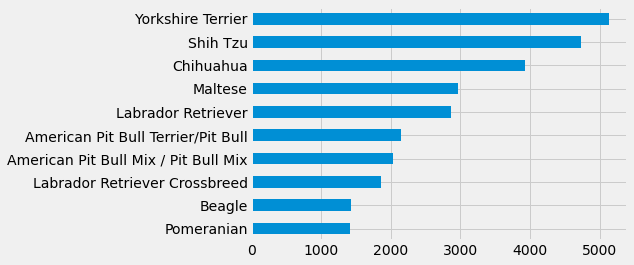

In [30]:
#bad but accurate
df[df['Primary Breed'] !='Unknown']['Primary Breed'].value_counts().head(10).sort_values().plot(kind='barh')

<AxesSubplot:>

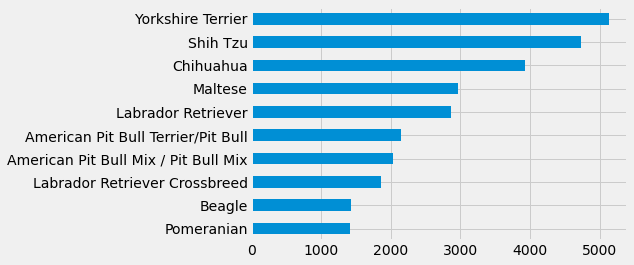

In [31]:
breeds.value_counts().head(10).sort_values().plot(kind='barh')

## What are the most popular dog names?

In [33]:
names=df["Animal Name"].str.lower()

<AxesSubplot:>

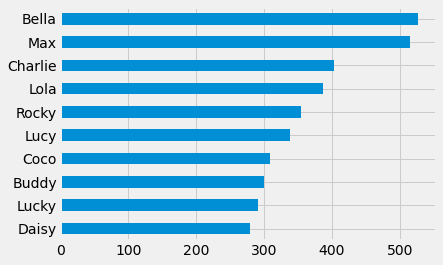

In [34]:
df[df['Animal Name'] !='UNKNOWN']['Animal Name'].value_counts().head(10).sort_values().plot(kind='barh')

In [35]:
names.value_counts().head(10)

bella      667
max        652
charlie    499
lola       468
coco       444
rocky      444
lucy       406
buddy      379
no name    374
lucky      372
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [36]:
# Suze = "Susan, Sue, Suzie, Suzanne, Suzan"
# # find_names = re.findall(r"Jo.{0,2}n\b",names)
# # find_names

In [37]:
names[names == 'susan'].value_counts()

susan    1
Name: Animal Name, dtype: int64

In [38]:
names[names == 'max'].value_counts()

max    652
Name: Animal Name, dtype: int64

In [39]:
# names[names == 'max'].value_counts()

In [40]:
names[names == 'maxwell'].value_counts()

maxwell    37
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [41]:
s.value_counts(dropna=True)

NameError: name 's' is not defined

In [43]:
Guard = df['Guard or Trained']
df['Guard or Trained'].value_counts(normalize=True)

No     0.998971
Yes    0.001029
Name: Guard or Trained, dtype: float64

In [44]:
# works but not as good
# Guard = df['Guard or Trained']
# Guard.value_counts(['Guard'])*100

## What are the actual numbers?

In [45]:
df['Guard or Trained'].value_counts(normalize=True, dropna=False)

No     0.604428
NaN    0.394950
Yes    0.000622
Name: Guard or Trained, dtype: float64

In [46]:
df['Guard or Trained'].value_counts()

No     49525
Yes       51
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [ ]:
df['Guard or Trained'].value_counts(dropna=False)

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [ ]:
df['Guard or Trained'] = df['Guard or Trained'].str.replace("NaN", "No", regex=False)

In [ ]:
df['Guard or Trained'].value_counts()

## What are the top dog breeds for guard dogs? 

In [ ]:
#step 1 filter
#step 2 get a row
#step 3 coybt it
df[df['Guard or Trained'] == 'Yes']...

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [ ]:
# since animal birth is a datetime, we can do .dt.year
# abnd the we save it into a new ciolumn called birth_year
# we can't do this df.birth_year =  because we need square brackets
df['birth_year'] = df['Animal Birth'].dt.year
df['Animal Birth'].dt.year

In [ ]:
df['age'] = 2021 -df['birth_year']
df.age.describe()

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [ ]:
zips = pd.read_csv("zipcodes-neighborhoods.csv")
zips.head(5)

In [ ]:
#left on means df, the one on the left
merged2 = df.merge(zips, left_on='Owner Zip Code', right_on='zip')
merged2.head()

In [254]:
# how='inner' is the default - only keeps matches
# how='left' will keep dogs without neighborhoods
# how='right' would have kept neighborhoods without dogs
# how='outer' would have kept everyone on both sides without a match
merged3 = df.merge(zips, how='left', left_on='Owner Zip Code', right_on='zip')
merged3.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Greenwich Village and Soho,10013.0,Manhattan


In [255]:
merged2.shape

(80859, 20)

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [258]:
bronx = merged3[[merged3.borough == 'Bronx'][merged3['Animal Name']]]
bronx.head(10)

TypeError: list indices must be integers or slices, not Series

In [ ]:
brooklyndogs = merged2[(merged2.borough == 'Brooklyn') & (merged2['Animal Name'])]
brooklyndogs.head(10)

In [ ]:
ues = merged2[(merged2.neighborhood == 'Upper East Side') & (merged2['Animal Name'])]
ues

In [ ]:
%%
df['Animal Birth']

## What is the most common dog breed in each of the neighborhoods of NYC?

In [ ]:
merged3.groupby(by='neighborhood')['Primary Breed'] \
.value_counts() \ 


In [ ]:
merged2[(merged2.borough == 'Upper East Side') & (merged2['Primary Breed'])]

In [ ]:
merged3.groupby(by='neighborhood')['Primary Breed'].value_counts().grouby(level=0, group_keys=False).nlargest

In [259]:
merged3.groupby('neighborhood').PrimaryBreed.value_counts().groupby(level=0).head(1)

AttributeError: 'DataFrameGroupBy' object has no attribute 'PrimaryBreed'

## What breed of dogs are the least likely to be spayed? Male or female?

In [260]:
df.groupby('Primary Breed')['Spayed or Neut']



df.colname
df['colname']

In [266]:
# soma's
# df.colname
# df['colname']
# df.groupby('Primary Breed').spayed_or_neut
pd.crosstab(df['Primary Breed'], df['Spayed or Neut'], normalize='index') \
    .sort_values(by='No', ascending=False)

Spayed or Neut,No,Yes
Primary Breed,,
"Mastiff, Tibetan",1.0,0.0
American Water Spaniel,1.0,0.0
Mudi,1.0,0.0
Black Russian Terrier,1.0,0.0
Kromfohrlander,1.0,0.0
...,...,...
Giant Schnauzer,0.0,1.0
German Wirehaired Pointer,0.0,1.0
German Spitz,0.0,1.0


In [277]:
# count counts non null values
df.pivot_table(values='age',
               index='Primary Breed',
               columns='Spayed or Neut',
               aggfunc=['median', 'sum'])

KeyError: 'age'

In [268]:
#PIVOT TAVL
df.pivot_table(index='Primary Breed', 
               columns='Spayed or Neut',
              aggfunc='size')

Spayed or Neut,No,Yes
Primary Breed,,
Affenpinscher,3.0,17.0
Afghan Hound,3.0,11.0
Airedale Terrier,8.0,21.0
Akita,24.0,74.0
Akita Crossbreed,5.0,36.0
...,...,...
Wire Fox Terrier,13.0,105.0
Wirehaired Pointing Griffon,3.0,4.0
Xoloitzcuintli,NaN,2.0


In [265]:
# comare the count for primary breed to spayed or neutered
pd.crosstab(df['Primary Breed'], df['Spayed or Neut'], normalize='index').sort_values(by='No', ascending=False)

Spayed or Neut,No,Yes
Primary Breed,,
"Mastiff, Tibetan",1.0,0.0
American Water Spaniel,1.0,0.0
Mudi,1.0,0.0
Black Russian Terrier,1.0,0.0
Kromfohrlander,1.0,0.0
...,...,...
Giant Schnauzer,0.0,1.0
German Wirehaired Pointer,0.0,1.0
German Spitz,0.0,1.0


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [ ]:
# and is &
# or is |
# not is ~

In [276]:
# just lookinbg at animal dominant color
# ampersand means | Pipe means OR
df['Animal Dominant Color'].str.lower().isin(['black', 'white', 'grey']) | df['Animal Secondary Color'].str.lower().isin(['black', 'white', 'grey']) | df['Animal Third Color'].str.lower().isin(['black', 'white', 'grey'])

0        False
1         True
2        False
3        False
4         True
         ...  
81932    False
81933    False
81934    False
81935     True
81936    False
Name: Animal Dominant Color, Length: 81937, dtype: bool

## How many dogs are in each borough? Plot it in a graph.

In [278]:
df['borough'].value_counts().sort_values()

KeyError: 'borough'

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [ ]:
pops = pd.read_csv("boro_population.csv")
pops.head()

In [ ]:
#left on means df, the one on the left
# merged = df.merge(products, left_on='Product_1', right_on='Value')
# merged.head()

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?